Proyecto Portafolios de inversión P2024 Rolando Fortanell, Ana Paula Moreno y Diego Lozoya

#Librerías

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Elección de activos

[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  15 of 15 completed


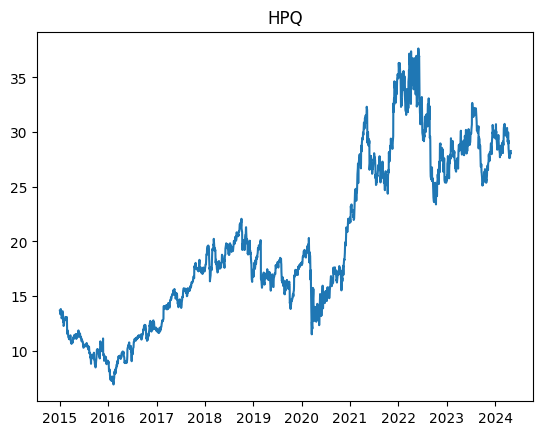

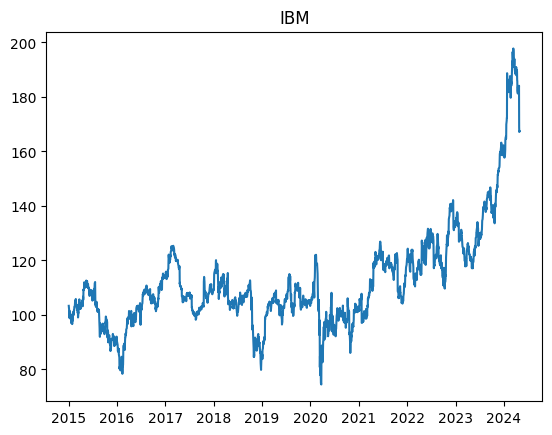

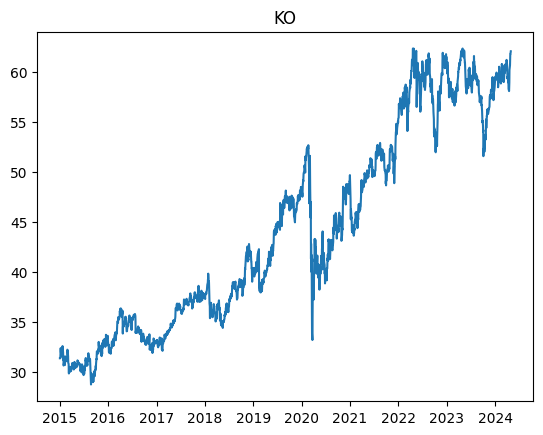

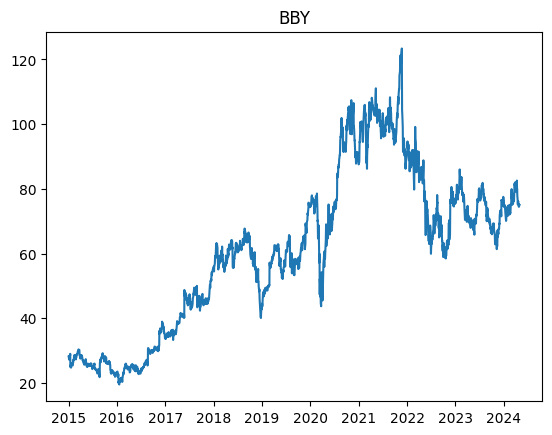

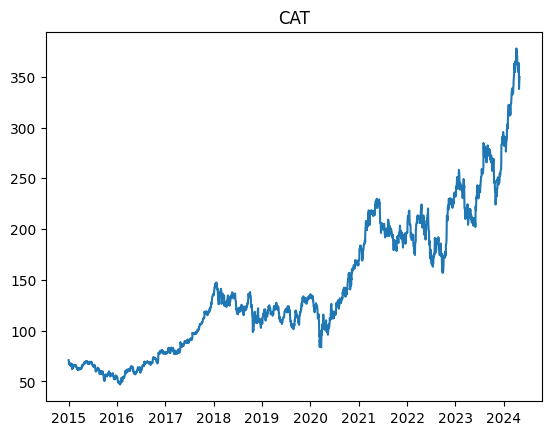

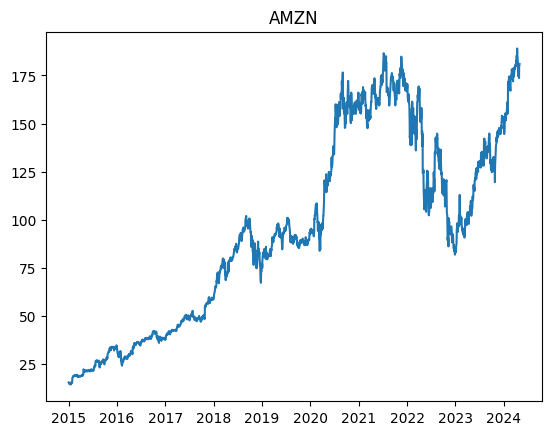

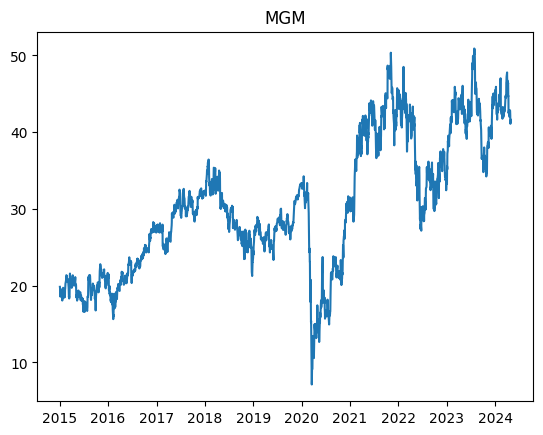

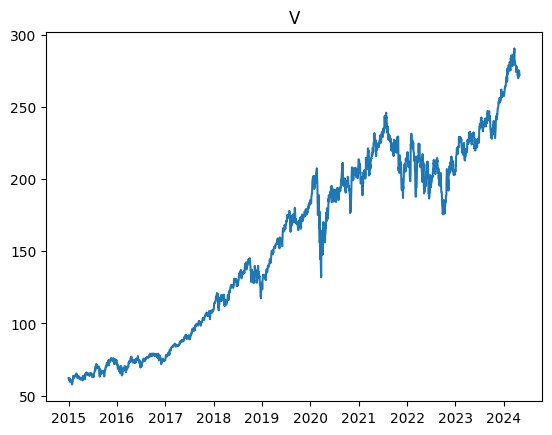

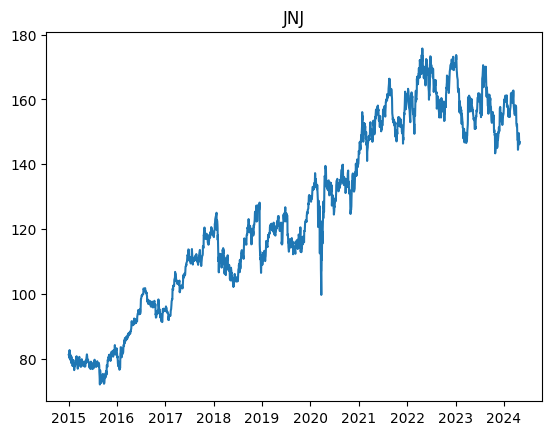

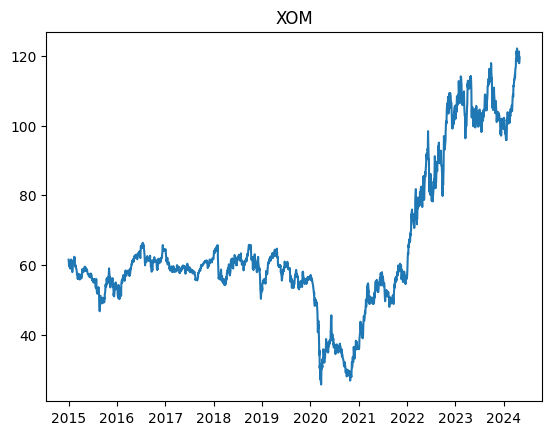

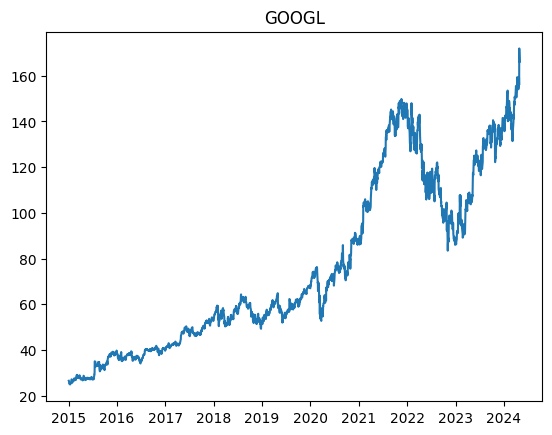

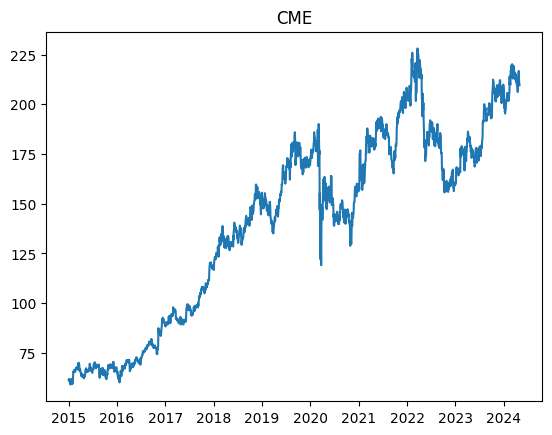

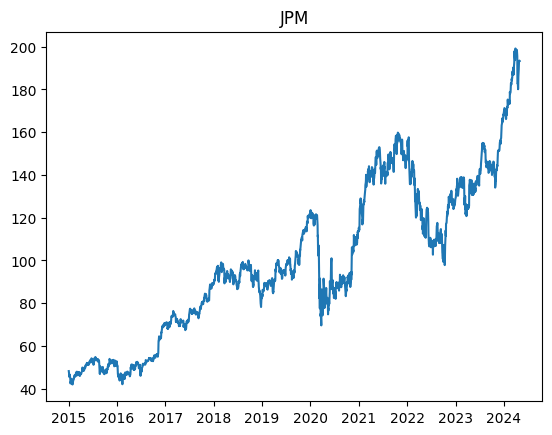

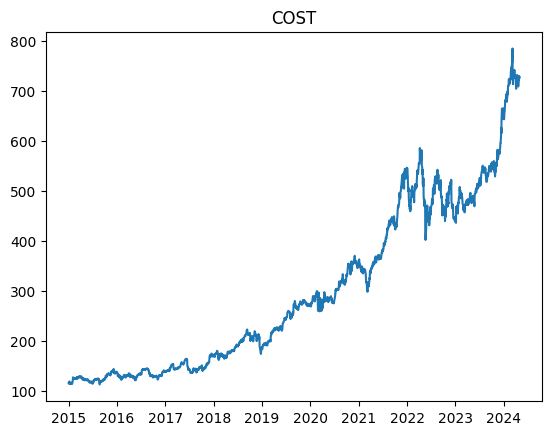

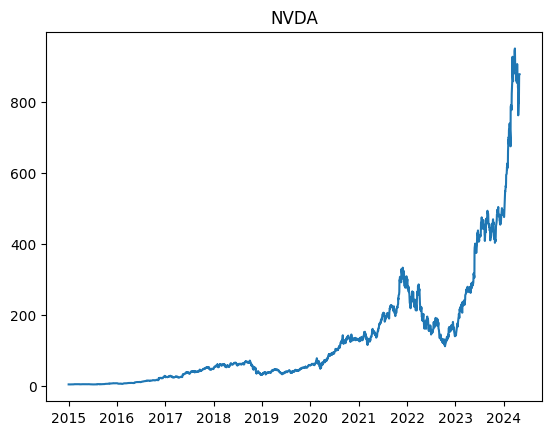

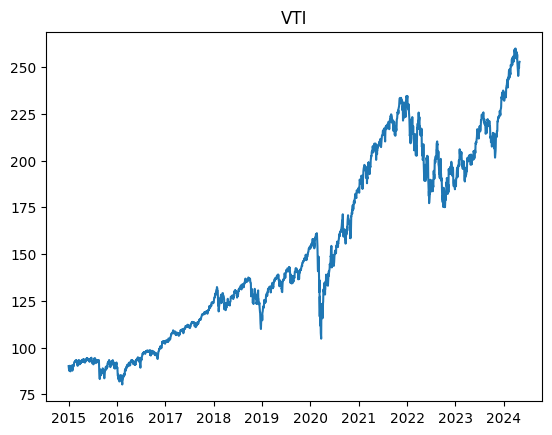

In [37]:
tickers = ['HPQ', 'IBM', 'KO', 'BBY', 'CAT',
           'AMZN', 'MGM', 'V', 'JNJ', 'XOM',
           'GOOGL', 'CME', 'JPM', 'COST', 'NVDA',
           'VTI']

tickers2 = tickers.copy()
tickers2.remove("VTI")
start_date = '2015-01-01'
end_date = "2024-04-30"


St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
Stock = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()
returns = Stock.pct_change().dropna()

for i in tickers:
    plt.figure()
    plt.plot(St[i])
    plt.title(i)

In [2]:
tickers = ['HPQ', 'IBM', 'KO', 'BBY', 'CAT',
           'AMZN', 'MGM', 'V', 'JNJ', 'XOM',
           'GOOGL', 'CME', 'JPM', 'COST', 'NVDA',
           'VTI']

tickers2 = tickers.copy()
tickers2.remove("VTI")
start_date = '2015-01-01'
end_date = "2024-04-30"


St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
Stock = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()
returns = Stock.pct_change().dropna()

[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  15 of 15 completed


In [3]:
r2s = []
betas = []
rendimiento = []
volatilidad = []

for i in tickers2:
    X = rt[["VTI"]]
    y = returns[[i]]

    #Calculo de beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)

    #Calculo de R2
    predictions = model.predict(X)
    r2 = r2_score(y_true=y, y_pred=predictions)
    r2s.append(r2)

    #Rendimiento
    rend = np.mean(returns[[i]]) * 252
    rendimiento.append(rend)

    #Volatilidad
    vol = np.std(returns[i]) * 252**(1/2)
    volatilidad.append(vol)

In [4]:
df = pd.DataFrame()
df["tickers"] = tickers2
df["betas"] = betas
df["r2"] = r2s
df["rendimientos"] = rendimiento
df["volatilidad"] = volatilidad

df

,tickers,betas,r2,rendimientos,volatilidad
0,HPQ,1.194999,0.410084,0.136673,0.340961
1,IBM,0.829306,0.396817,0.080926,0.240544
2,KO,0.588879,0.354403,0.089801,0.180739
3,BBY,1.125802,0.306557,0.173823,0.371518
4,CAT,1.056092,0.414218,0.216647,0.299820
5,AMZN,1.117113,0.381813,0.318988,0.330328
6,MGM,1.616580,0.416472,0.185252,0.457697
7,V,1.053289,0.601886,0.189380,0.248064
8,JNJ,0.537786,0.291995,0.080215,0.181843
9,XOM,0.873229,0.318568,0.111445,0.282684


##Bootstrap

In [5]:
betas_dict = {}
r2_dict = {}
model = LinearRegression()
n_reps = 1000

for i in tickers2:
    betas_dict[i] = []
    r2_dict[i] = []
    for j in range(n_reps):
        #Betas
        flag_frame = rt.sample(len(rt), replace=True)
        X = flag_frame[["VTI"]]
        y = flag_frame[[i]]
        model.fit(X, y)
        beta = model.coef_[0][0]
        betas_dict[i].append(beta)

        #R2
        predictions = model.predict(X)
        r2 = r2_score(y_true=y, y_pred=predictions)
        r2_dict[i].append(r2)

###Betas

In [6]:
df_betas_bootstrap = pd.DataFrame({})

for i in tickers2:
    df_betas_bootstrap[i] = betas_dict[i]

df_betas_bootstrap.head()

,HPQ,IBM,KO,BBY,CAT,AMZN,MGM,V,JNJ,XOM,GOOGL,CME,JPM,COST,NVDA
0,1.279087,0.801113,0.566229,1.216528,1.056455,1.130396,1.661905,1.098459,0.588836,0.839846,1.146415,0.757247,1.136191,0.739526,1.736866
1,1.147710,0.807787,0.577837,1.149443,0.998818,1.146629,1.706875,1.075936,0.555267,0.859973,1.102588,0.705200,1.074332,0.717041,1.639847
2,1.198845,0.820925,0.624269,1.139759,1.143794,1.130687,1.477656,1.080931,0.503945,0.891874,1.121532,0.721490,1.061567,0.684849,1.684209
3,1.254879,0.765603,0.564875,1.140889,1.115212,1.195610,1.426729,1.075223,0.504831,0.911643,1.131693,0.775274,1.073929,0.688435,1.633611
4,1.247272,0.837033,0.570072,1.156633,1.069057,1.096125,1.456902,1.051212,0.559601,0.940296,1.140801,0.842719,1.003234,0.727820,1.688079


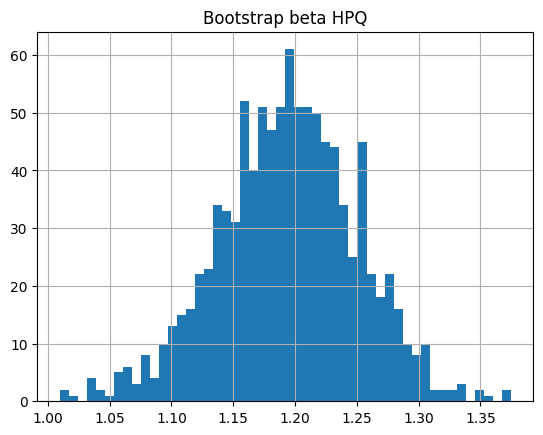

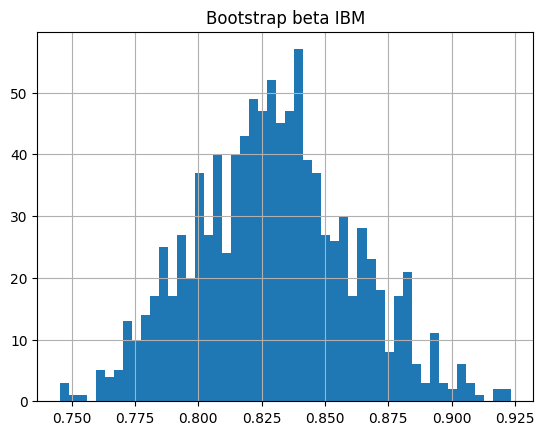

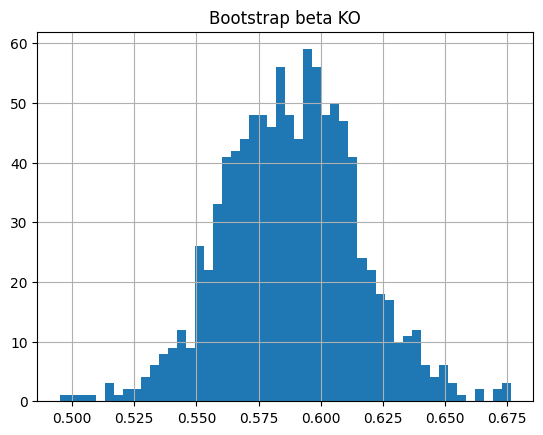

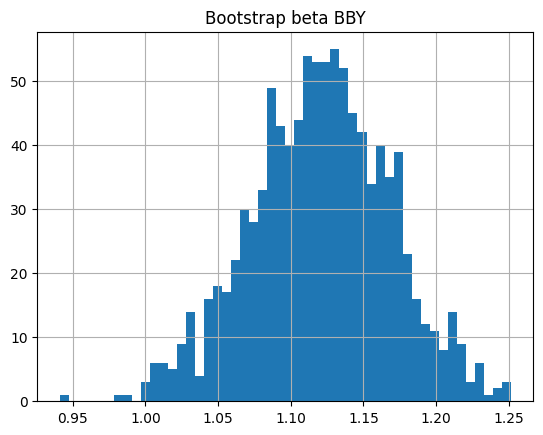

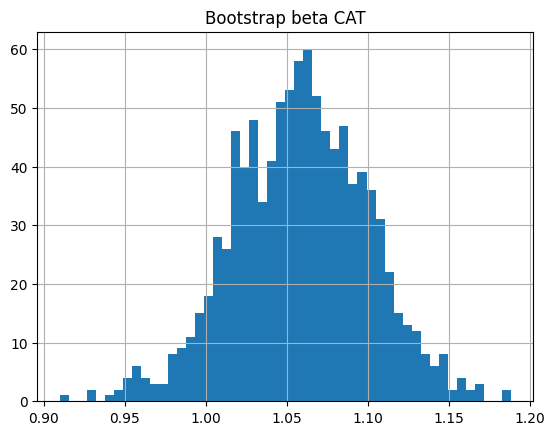

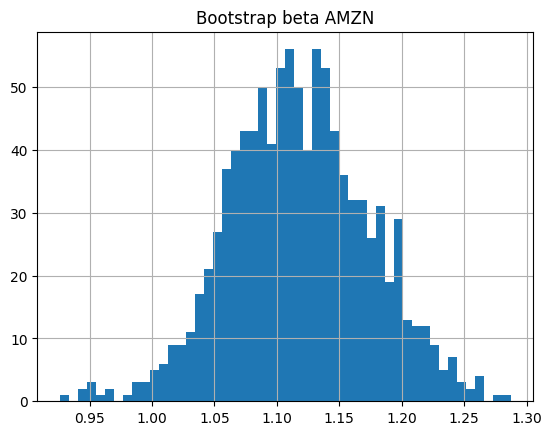

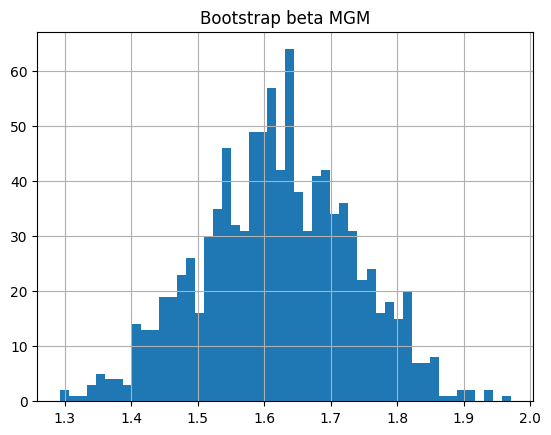

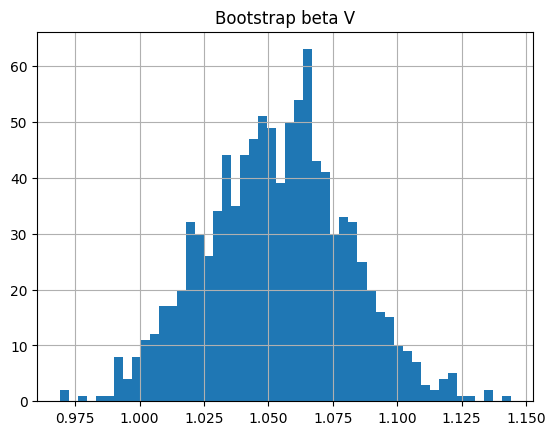

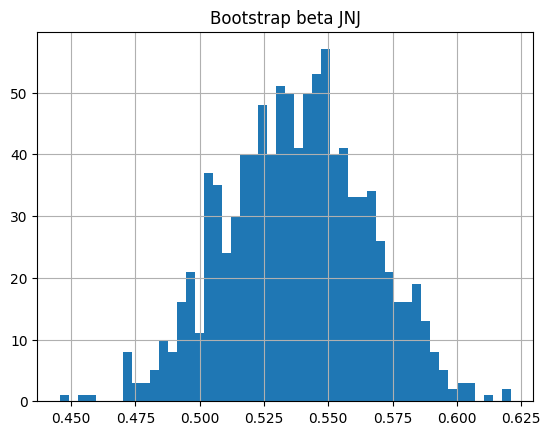

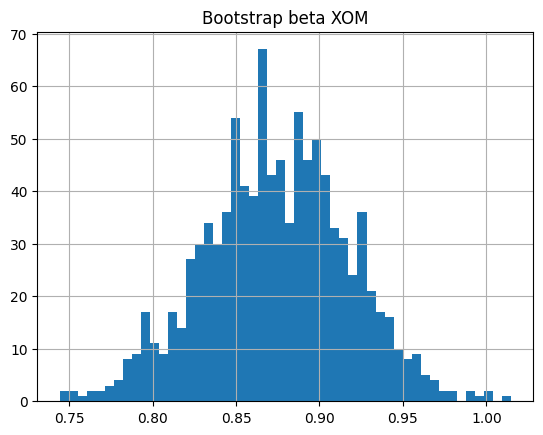

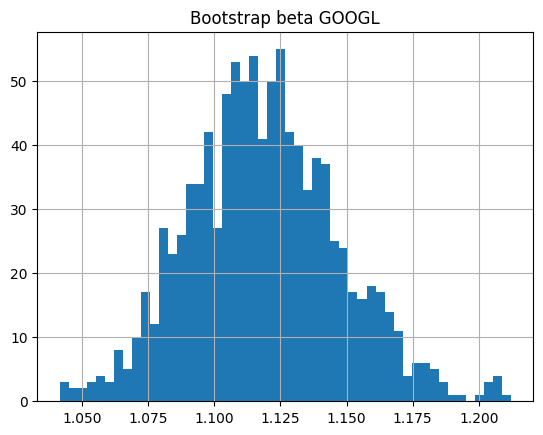

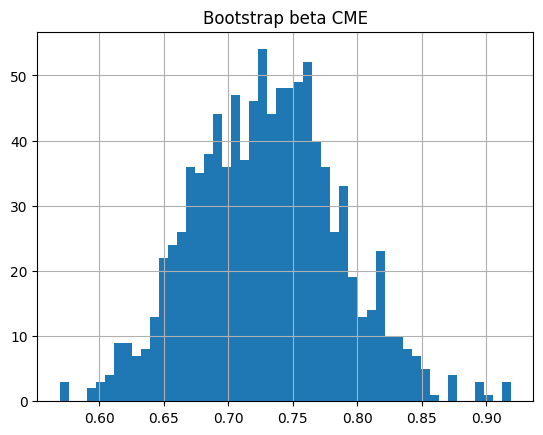

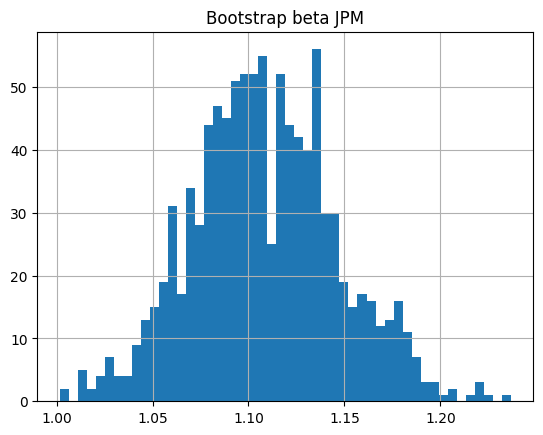

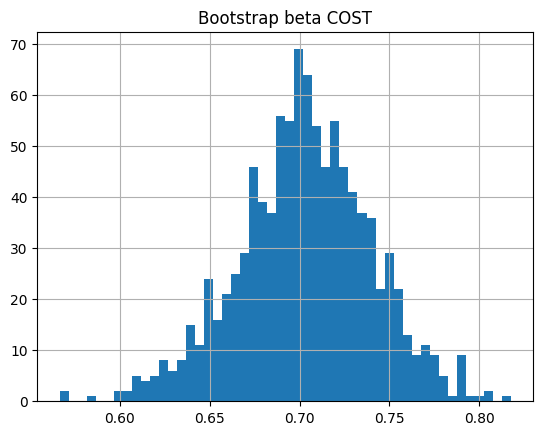

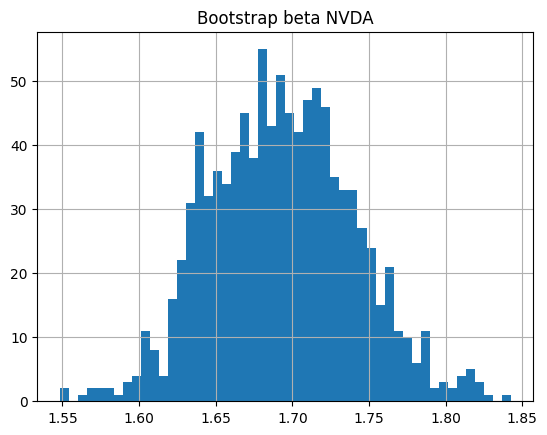

In [7]:
for i in tickers2:
    plt.figure()
    plt.title("Bootstrap beta " + i)
    plt.hist(betas_dict[i], bins=50)
    plt.grid()

In [8]:
print("La probabilidad de que la beta de HPQ esté entre 1.1 y 1.3 es de: " + str(np.round((((df_betas_bootstrap["HPQ"] > 1.1) & (df_betas_bootstrap["HPQ"] < 1.3)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de HPQ esté entre 1.1 y 1.3 es de: 92.4%


In [9]:
print("La probabilidad de que la beta de IBM esté entre 0.775 y 0.875 es de: " + str(np.round((((df_betas_bootstrap["IBM"] > 0.755) & (df_betas_bootstrap["IBM"] < 0.875)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de IBM esté entre 0.775 y 0.875 es de: 91.3%


In [10]:
print("La probabilidad de que la beta de KO esté entre 0.550 y 0.650 es de: " + str(np.round((((df_betas_bootstrap["KO"] > 0.550) & (df_betas_bootstrap["KO"] < 0.650)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de KO esté entre 0.550 y 0.650 es de: 92.4%


In [11]:
print("La probabilidad de que la beta de BBY esté entre 1.05 y 1.2 es de: " + str(np.round((((df_betas_bootstrap["BBY"] > 1.05) & (df_betas_bootstrap["BBY"] < 1.2)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de BBY esté entre 1.05 y 1.2 es de: 87.6%


In [12]:
print("La probabilidad de que la beta de CAT esté entre 0.975 y 1.125 es de: " + str(np.round((((df_betas_bootstrap["CAT"] > 0.975) & (df_betas_bootstrap["CAT"] < 1.125)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de CAT esté entre 0.975 y 1.125 es de: 92.2%


In [13]:
print("La probabilidad de que la beta de AMZN esté entre 1 y 1.25 es de: " + str(np.round((((df_betas_bootstrap["AMZN"] > 1) & (df_betas_bootstrap["AMZN"] < 1.25)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de AMZN esté entre 1 y 1.25 es de: 97.5%


In [14]:
print("La probabilidad de que la beta de MGM esté entre 1.4 y 1.8 es de: " + str(np.round((((df_betas_bootstrap["MGM"] > 1.4) & (df_betas_bootstrap["MGM"] < 1.8)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de MGM esté entre 1.4 y 1.8 es de: 91.5%


In [15]:
print("La probabilidad de que la beta de V esté entre 1 y 1.1 es de: " + str(np.round((((df_betas_bootstrap["V"] > 1) & (df_betas_bootstrap["V"] < 1.1)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de V esté entre 1 y 1.1 es de: 93.6%


In [16]:
print("La probabilidad de que la beta de JNJ esté entre 0.5 y 0.575 es de: " + str(np.round((((df_betas_bootstrap["JNJ"] > 0.5) & (df_betas_bootstrap["JNJ"] < 0.575)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de JNJ esté entre 0.5 y 0.575 es de: 82.8%


In [17]:
print("La probabilidad de que la beta de XOM esté entre 0.8 y 0.95 es de: " + str(np.round((((df_betas_bootstrap["XOM"] > 0.8) & (df_betas_bootstrap["XOM"] < 0.95)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de XOM esté entre 0.8 y 0.95 es de: 91.3%


In [18]:
print("La probabilidad de que la beta de GOOGL esté entre 1.075 y 1.175 es de: " + str(np.round((((df_betas_bootstrap["GOOGL"] > 1.075) & (df_betas_bootstrap["GOOGL"] < 1.175)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de GOOGL esté entre 1.075 y 1.175 es de: 91.6%


In [19]:
print("La probabilidad de que la beta de CME esté entre 0.65 y 0.8 es de: " + str(np.round((((df_betas_bootstrap["CME"] > 0.65) & (df_betas_bootstrap["CME"] < 0.8)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de CME esté entre 0.65 y 0.8 es de: 83.2%


In [20]:
print("La probabilidad de que la beta de JPM esté entre 1.05 y 1.2 es de: " + str(np.round((((df_betas_bootstrap["JPM"] > 1.05) & (df_betas_bootstrap["JPM"] < 1.2)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de JPM esté entre 1.05 y 1.2 es de: 93.7%


In [21]:
print("La probabilidad de que la beta de COST esté entre 0.65 y 0.775 es de: " + str(np.round((((df_betas_bootstrap["COST"] > 0.65) & (df_betas_bootstrap["COST"] < 0.775)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de COST esté entre 0.65 y 0.775 es de: 89.2%


In [22]:
print("La probabilidad de que la beta de NVDA esté entre 1.6 y 1.775 es de: " + str(np.round((((df_betas_bootstrap["NVDA"] > 1.6) & (df_betas_bootstrap["NVDA"] < 1.775)).mean() * 100), 3)) + "%")

La probabilidad de que la beta de NVDA esté entre 1.6 y 1.775 es de: 94.1%


###R2s

In [23]:
df_r2s_bootstrap = pd.DataFrame({})

for i in tickers2:
    df_r2s_bootstrap[i] = r2_dict[i]

df_r2s_bootstrap.head()

,HPQ,IBM,KO,BBY,CAT,AMZN,MGM,V,JNJ,XOM,GOOGL,CME,JPM,COST,NVDA
0,0.424616,0.407447,0.340313,0.336529,0.410803,0.398748,0.454563,0.600739,0.350383,0.292136,0.526879,0.350224,0.560579,0.379005,0.479033
1,0.405498,0.395517,0.354362,0.314431,0.380392,0.367783,0.457805,0.613122,0.300199,0.304266,0.501000,0.252668,0.553853,0.389805,0.397356
2,0.451986,0.356583,0.414487,0.283391,0.426669,0.403044,0.354648,0.594054,0.246343,0.310360,0.536991,0.318044,0.533279,0.323124,0.428287
3,0.474216,0.318201,0.386721,0.244036,0.408753,0.412124,0.319267,0.622096,0.263944,0.358936,0.499282,0.309689,0.541522,0.296894,0.420423
4,0.442382,0.407755,0.321828,0.320123,0.456458,0.370217,0.360688,0.611607,0.330187,0.337516,0.543565,0.380354,0.505074,0.366164,0.444250


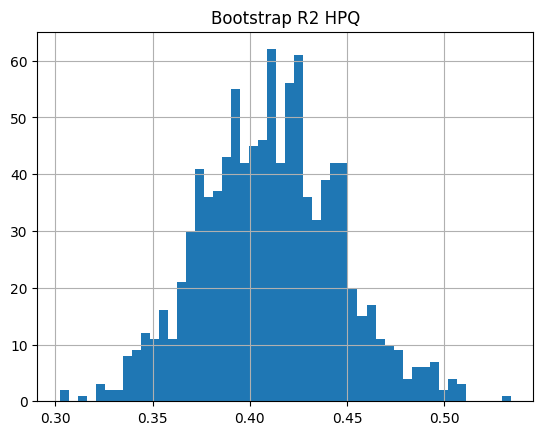

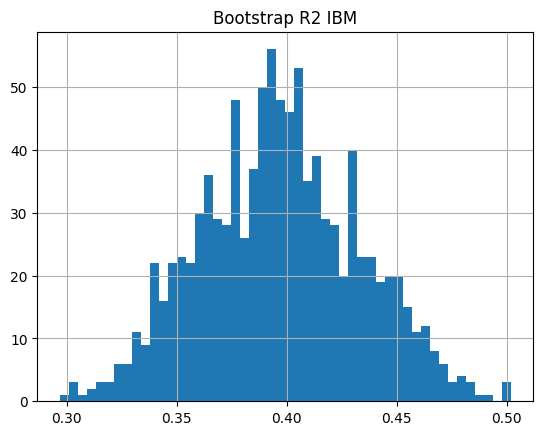

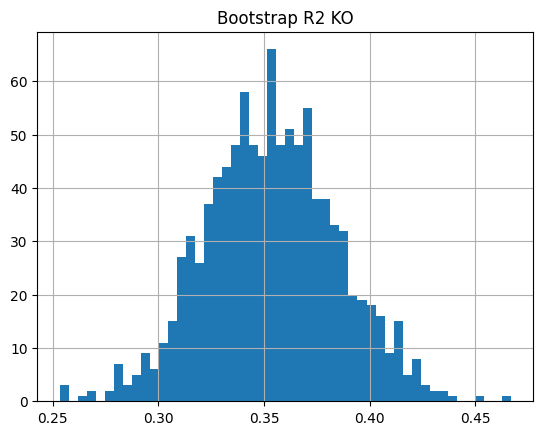

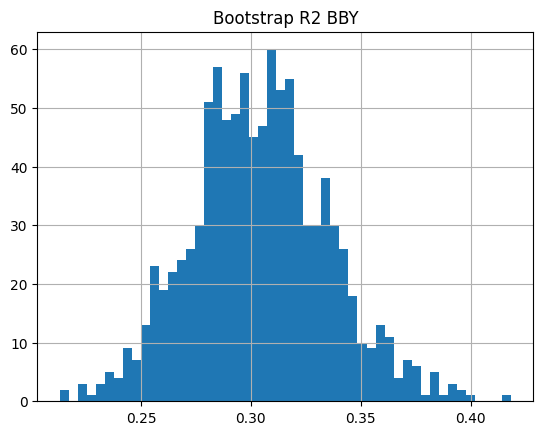

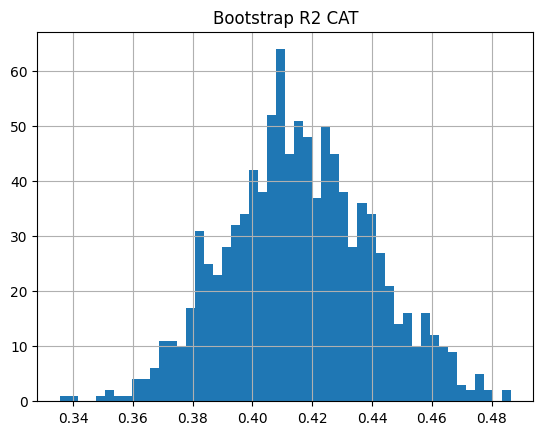

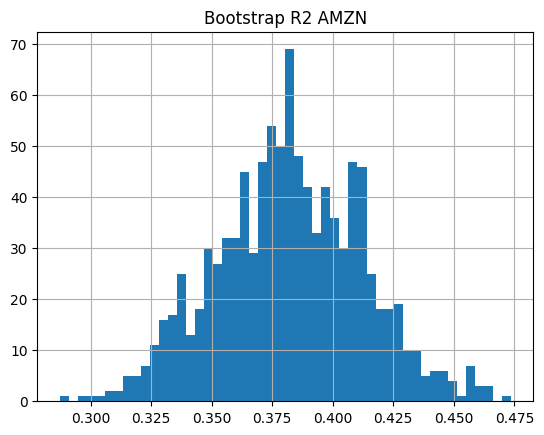

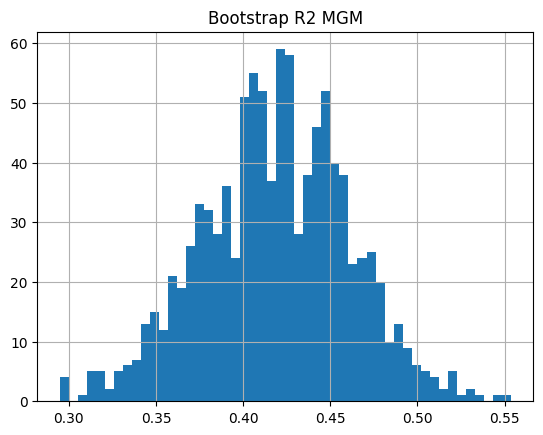

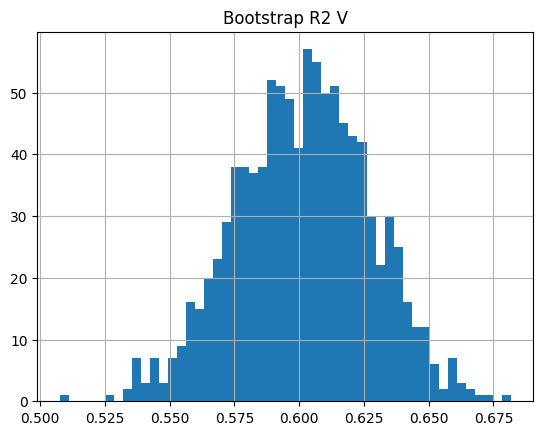

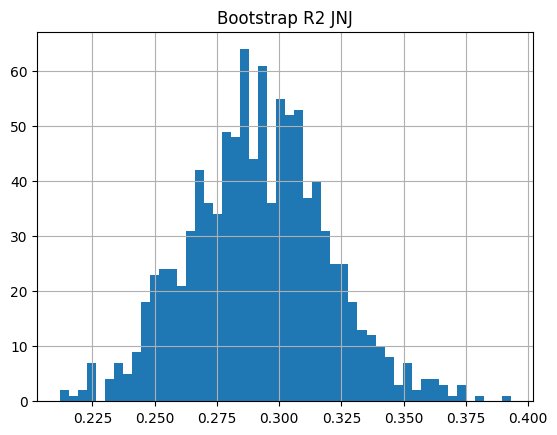

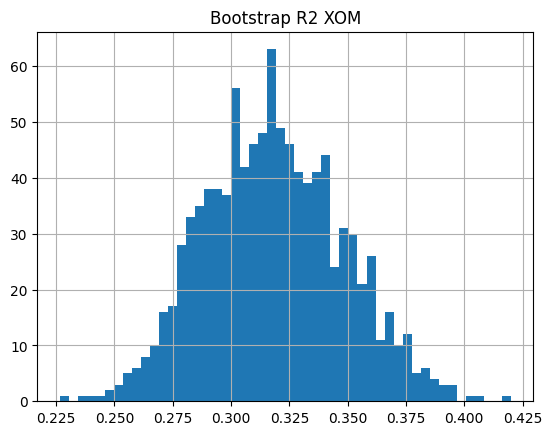

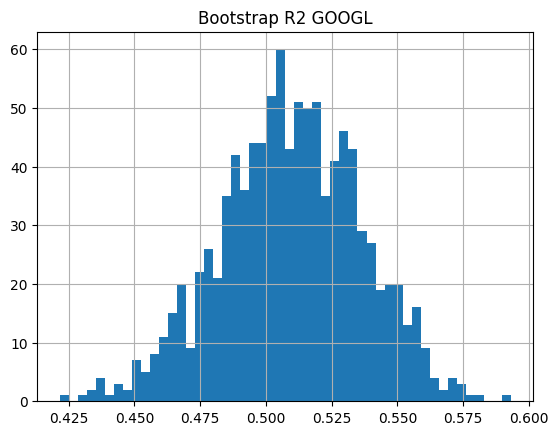

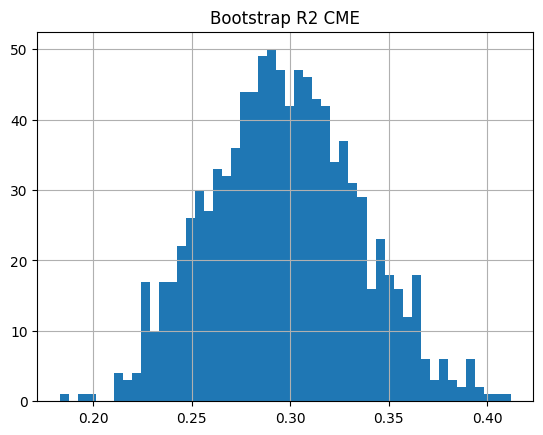

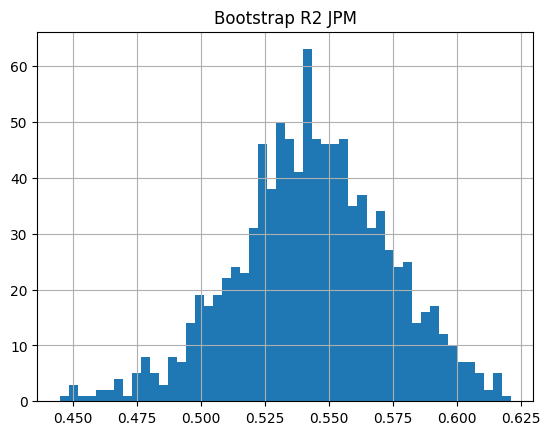

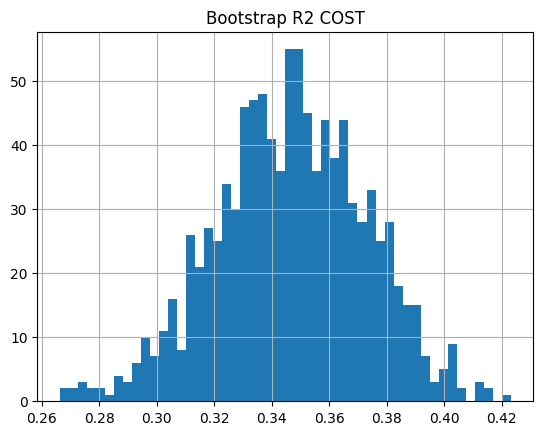

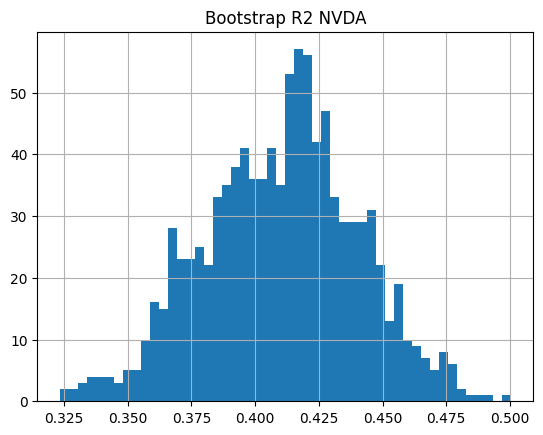

In [24]:
for i in tickers2:
    plt.figure()
    plt.title("Bootstrap R2 " + i)
    plt.hist(r2_dict[i], bins=50)
    plt.grid()

In [25]:
print("La probabilidad de que el R2 de las acciones sea mayor a 0.5 es de: ")
for i in tickers2:
    print("  " + i + ": " + str(np.round(((df_r2s_bootstrap[i] > 0.5).mean() * 100), 3)) + "%")

La probabilidad de que el R2 de las acciones sea mayor a 0.5 es de: 
  HPQ: 0.8%
  IBM: 0.2%
  KO: 0.0%
  BBY: 0.0%
  CAT: 0.0%
  AMZN: 0.0%
  MGM: 2.5%
  V: 100.0%
  JNJ: 0.0%
  XOM: 0.0%
  GOOGL: 64.5%
  CME: 0.0%
  JPM: 92.5%
  COST: 0.0%
  NVDA: 0.1%


##Análisis de acciones

### HP Inc. (HPQ)
Es una empresa tecnológica que se dedica al suministro de computadoras personales y otros dispositivos de acceso, productos de imágenes e impresión, y tecnologías, soluciones y servicios relacionados.
- Tiene un market cap de $27,808 MDD
- El precio de la acción de HPQ es de 484.49 pesos mexicanos , lo que está por debajo de la estimación de valor justo de 548.95 pesos mexicanos
- Su P/E Ratio es de 8.2, esta relación es inferior a la media de empresas similares y a la media de la industria Global Tech, lo que indica que HPQ podría estar infavalorada en comparación con sus pares.
- HP Inc. se considera una empresa de crecimiento debido a que ha aumentado sus ganancias en los últimos años.

### International Business Machines Corp. (IBM)
International Business Machines Corp. es una empresa de tecnología de la información, que se dedica a la provisión de soluciones integradas que aprovechan la tecnología de la información y el conocimiento de los procesos comerciales. Opera a través de los siguientes segmentos: Software, Consultoría, Infraestructura, Financiamiento y Otros
- Tiene un market cap de $154,886 MDD
- El precio de la acción de IBM es de 126.55 dólares estadounidenses, lo que está por debajo de la estimación de valor justo de 140.00 dólares estadounidenses.
- Su P/E Ratio actual es de 18.8, es superior a la media de empresas similares y a la media de la industria Tecnología de la Información, sigue siendo relativamente bajo en comparación con otras empresas tecnológicas de crecimiento. Esto puede indicar que IBM podría estar infravalorada en comparación con sus pares.
- IBM se considera una empresa de valor debido a su bajo precio en relación con sus fundamentos financieros y su historial de dividendos que han sido consistentes. Sin embargo, la empresa también está invirtiendo en áreas de crecimiento como la nube, la inteligencia artificial y la seguridad cibernética.

### The Coca-Cola Company (KO)
The Coca-Cola Co. se dedica a la fabricación y comercialización de bebidas no alcohólicas.
- Tiene un market cap de $268,601 MDD
-  El precio actual de la acción de Coca-Cola es de 62.17 dólares estadounidenses, lo que está por debajo de la estimación de valor justo de 63.50 dólares estadounidenses.
- Su P/E Ratio es de 25 , lo que significa que los inversionistas están dispuestos a pagar 25 dólares estadounidenses por cada dólar de beneficio generado por la empresa. Esta relación es superior a la media de empresas similares y a la media de la industria Bebidas, lo que indica que KO podría estar sobrevalorada en comparación con sus pares.
- The Coca-Cola Company se considera una empresa de valor debido a su fuerte marca y su presencia global. La empresa ha estado generando ingresos estables y beneficios consistentes, y ha aumentado su dividendo durante 59 años consecutivos.

### Best Buy Co., Inc. (BBY)
Best Buy Co., Inc. se dedica a la provisión de productos y servicios de tecnología de consumo. Opera a través de dos segmentos de negocio: Doméstico e Internacional.
- Tiene un market cap de $16,112 MDD
- El precio actual de la acción de Best Buy es de 74.47 dólares estadounidenses.
- Su P/E Ratio es de 13.1, esta relación es inferior a la media de empresas similares y a la media de la industria de tecnología, lo que indica que Best Buy podría estar infravalorada en comparación con sus pares.
- Best Buy se considera una empresa de crecimiento debido a su fuerte marca y su presencia global. La empresa ha estado generando ingresos estables y beneficios consistentes, y ha aumentado su dividendo durante 16 años consecutivos.

### Caterpillar Inc. (CAT)
Caterpillar, Inc. se dedica al negocio de la fabricación de equipos de construcción y minería, motores diésel y de gas natural para uso fuera de carretera, turbinas de gas industriales y locomotoras diésel-eléctricas. Opera a través de los siguientes segmentos: Industrias de la Construcción, Industrias de Recursos, Energía y Transporte, Productos Financieros y Todos los Demás.
- Tiene un market cap de $167,305 MDD
- El precio actual de la acción de Caterpillar es de 336.75 dólares estadounidenses.
- Su P/E Ratio es de 15.2, lo que significa que los inversionistas están dispuestos a pagar 15.2 dólares estadounidenses por cada dólar de beneficio generado por la empresa. Esta relación es inferior a la media de empresas similares y a la media de la industria, lo que indica que Caterpillar podría estar infravalorada en comparación con sus pares.
- Caterpillar se considera una empresa de valor debido a su fuerte marca y su presencia global. La empresa ha estado generando ingresos estables y beneficios consistentes, y ha aumentado su dividendo durante 26 años consecutivos.

### Amazon.com, Inc. (AMZN)
Amazon.com, Inc. es una empresa multinacional de tecnología que se dedica a proporcionar servicios de compras minoristas en línea. Opera a través de los siguientes segmentos: América del Norte, Internacional y Amazon Web Services (AWS).
- Tiene un market cap de $1.964 BDD
- El precio actual de la acción de Amazon es de 186.21 dólares estadounidenses.
- Su P/E Ratio es de 52.6, lo que es superior a la media de empresas similares y a la media de la industria, lo que indica que Amazon podría estar sobrevalorada en comparación con sus pares.
- Amazon se considera una acción de crecimiento debido a su rápido crecimiento y a su innovación en varias industrias. La empresa ha aumentado consistentemente sus ingresos y beneficios en los últimos años, y tiene una fuerte marca y presencia global.

### MGM Resorts International (MGM)
MGM Resorts International es un holding que se dedica a la propiedad y operación de resorts de casino. Los resorts de casino de la empresa ofrecen juegos, hoteles, convenciones, restaurantes, entretenimiento, tiendas minoristas y otros servicios del resort. Opera a través de los siguientes segmentos de negocio: Las Vegas Strip Resorts, Regional Operations y MGM China.
- Tiene un market cap de $12,873 MDD
- El precio de una acción de MGM es de 41.04 dólares estadounidenses.
- El P/E Ratio actual de MGM Resorts International es de aproximadamente 15.66, lo que es ligeramente superior a la media de empresas similares y a la media de la industria de Hospitalidad y Entretenimiento. Esto puede indicar que MGM Resorts International está ligeramente sobrevalorada en comparación con sus pares.
- MGM se considera una empresa de valor debido a su bajo precio en relación con sus fundamentos financieros y su historial de dividendos que han sido consistentes. Sin embargo, la empresa también está invirtiendo en áreas de crecimiento como la apuesta deportiva y el juego en línea.

###  Visa Inc. Clase A (V)
Visa, Inc. se dedica a la prestación de servicios de pago digital. También facilita el comercio global a través de la transferencia de valor e información entre una red global de consumidores, comerciantes, instituciones financieras, empresas, socios estratégicos y entidades gubernamentales. Ofrece tarjetas de débito, tarjetas de crédito, productos prepagos, soluciones de pago comercial y cajeros automáticos globales.
- Tiene un market cap de $349,356 MDD
- El precio actual de las acciones de Visa Inc. Clase A es de aproximadamente 268.49 dólares estadounidenses, y su capitalización de mercado es de alrededor de 480.5 mil millones de dólares estadounidenses.
- El P/E Ratio de Visa Inc.es de 30.5, lo que es superior a la media de empresas similares y a la media de la industria de Servicios Financieros. Esto puede indicar que Visa Inc. Clase A podría estar sobrevalorada en comparación con sus pares. Sin embargo, la empresa sigue siendo una empresa de crecimiento con un historial de crecimiento de ingresos y ganancias consistentes, también porque está invirtiendo en áreas de crecimientoase como la tecnología (de pagos móviles y la ciberseguridad).

### Johnson & Johnson (JNJ)
Johnson & Johnson es un holding que se dedica a la investigación, desarrollo, fabricación y venta de productos en el campo de la salud. Opera a través de los segmentos de Medicina Innovadora y Tecnología Médica. El segmento de Medicina Innovadora se centra en la inmunología, las enfermedades infecciosas, la neurociencia, la oncología, el metabolismo cardiovascular y la hipertensión pulmonar.
- Tiene un market cap de $359,246 MDD
- El precio de una acción de JNJ es de 149.27 dólares.
- El P/E Ratio actual de Johnson & Johnson es de aproximadamente 21.5, lo que es ligeramente superior a la media de empresas similares y a la media de la industria de la salud.
- Johnson & Johnson se considera una empresa de valor debido a su bajo precio en relación con sus fundamentos financieros y su historial de dividendos que han sido consistentes. Sin embargo, la empresa también está invirtiendo en áreas de crecimiento como la investigación y el desarrollo de nuevos productos y tecnologías.

### Exxon Mobil Corporation (XOM)
Exxon Mobil Corp. se dedica a la exploración, desarrollo y distribución de petróleo, gas y productos derivados del petróleo. Opera a través de los siguientes segmentos: Upstream, Downstream y Chemical.
- Tiene un market cap de $523,597 MDD
- El precio de una acción de Exxon Mobil es de 116 dólares.
- El actual ratio P/E de Exxon Mobil Corporation es aproximadamente 14.23, lo que es ligeramente inferior a la media de la industria. Esto puede indicar que Exxon Mobil Corporation está infravalorada en comparación con sus pares.
- Exxon Mobil se considera una acción de valor debido a su bajo precio en relación con sus fundamentos financieros y su historial de dividendos consistentes. Sin embargo, la empresa también está invirtiendo en áreas de crecimiento como la investigación y el desarrollo de nuevas tecnologías.

### Alphabet Inc. (GOOGL)
Alphabet, Inc. es un holding que se dedica al software, la atención médica, el transporte y otras tecnologías. Opera a través de los siguientes segmentos: Servicios de Google, Google Cloud y Otras apuestas. El segmento de Servicios de Google incluye productos y servicios como anuncios, Android, Chrome, dispositivos, Google Maps, Google Play, la Búsqueda y YouTube.
- Tiene un market cap de $2.077 BDD
- El precio actual de la acción de Alphabet es de 169.19 dólares por acción.
- Su P/E Ratio es de 25.94, lo que es ligeramente superior a la media de la industria, lo que indica que Alphabet puede estar ligeramente sobrevalorada en comparación con sus pares.
- Alphabet se considera una acción de crecimiento debido a su rápido crecimiento y innovación en varias industrias. La empresa ha aumentado consistentemente sus ingresos y beneficios en los últimos años, y tiene una fuerte marca y presencia global.

### CME Group (CME)
CME Group, Inc. opera un mercado de derivados, que ofrece una gama de productos de futuros y opciones para la gestión de riesgos. Sus bolsas ofrecen una gama de productos de referencia global en todas las principales clases de activos basados en tasas de interés, índices bursátiles, divisas (FX), energía, materias primas agrícolas y metales. Ofrece futuros y opciones sobre el comercio de futuros en todas las clases de activos a través de la plataforma CME Globex, el comercio de renta fija a través de BrokerTec y el comercio de divisas en la plataforma EBS.
- Tiene un market cap de $74,893 MDD
- El precio actual de las acciones de CME Group es de 208.00 dólares estadounidenses.
- Su P/E Ratio es de 23.69, lo que es ligeramente superior a la media de la industria, lo que indica que CME Group podría estar ligeramente sobrevalorada en comparación con sus pares.
- CME Group se considera una acción de crecimiento debido a su rápido crecimiento y a su innovación en varias industrias. La empresa ha aumentado consistentemente sus ingresos y beneficios en los últimos años, y tiene una fuerte marca y presencia global.

### JPMorgan Chase & Co (JPM)
JPMorgan Chase & Co. es un holding financiero que se dedica a la prestación de servicios financieros y de banca de inversión. La firma ofrece una gama de productos y servicios de banca de inversión en todos los mercados de capitales, incluido el asesoramiento sobre estrategia y estructura corporativa, la obtención de capital en los mercados de valores y deuda, la gestión de riesgos, la creación de mercado en valores en efectivo e instrumentos derivados, y el corretaje y la investigación.
- Tiene un market cap de $551,361 MDD
- El precio actual de las acciones de JPMorgan Chase & Co es de 192 dólares estadounidenses.
- Su P/E Ratio es de 11.59, lo que es inferior a la media de la industria, lo que indica que JPMorgan Chase & Co podría estar infravalorada en comparación con sus pares.
- JPMorgan Chase & Co se considera una acción de valor debido a su bajo P/E Ratio y a su sólida posición financiera. La empresa tiene una fuerte presencia en el mercado de servicios financieros y ha demostrado ser resistente en diferentes ciclos económicos.

### Costco Wholesale Corp. (COST)
Se dedica a la operación de almacenes de membresía a través de subsidiarias de propiedad absoluta. Opera a través de los siguientes segmentos geográficos: Estados Unidos, Canadá y otras operaciones internacionales.
- Tiene un market cap de $335,489 MDD
- El precio actual de las acciones de Costco es de alrededor de 756.45 dólares estadounidenses.
-  Su P/E Ratio actual es de 49.60, lo que es significativamente superior a la media de empresas similares y a la media de la industria.
- Costco se considera una acción de crecimiento debido a su rápido crecimiento y a su innovación en la industria de los almacenes a granel. La empresa ha aumentado consistentemente sus ingresos y beneficios en los últimos años y tiene una fuerte marca y presencia global.

### NVIDIA Corp (NVDA)
Se dedica al diseño y fabricación de procesadores de gráficos por computadora, chipsets y software multimedia relacionado. Opera a través de los siguientes segmentos: Unidad de Procesamiento de Gráficos (GPU) y Computación y Redes. El segmento de gráficos incluye GPU GeForce para juegos y PC, el servicio de transmisión de juegos GeForce NOW y la infraestructura relacionada, GPU Quadro y NVIDIA RTX para gráficos de estaciones de trabajo empresariales, GPU virtual o vGPU, software para computación visual y virtual basada en la nube, plataformas automotrices para sistemas de infoentretenimiento y software Omniverse Enterprise para crear y operar aplicaciones de metaverso e Internet 3D.
- Tiene un market cap de $2.303 BDD
- El precio actual de las acciones de NVIDIA es de 921.40 dólares estadounidenses.
- Su P/E Ratio actual es de 77.43, lo que es significativamente superior a la media de empresas similares y a la media de la industria.
- A pesar del alto P/E Ratio, NVIDIA se considera una acción de crecimiento debido a su rápido crecimiento y a su innovación en la industria de las GPUs y el procesamiento de datos. La empresa ha aumentado consistentemente sus ingresos y beneficios en los últimos años y tiene una fuerte marca y presencia global. NVIDIA es líder en el mercado de GPUs y sus productos se utilizan en una amplia gama de aplicaciones, incluyendo juegos, inteligencia artificial, computación en la nube y centros de datos.

#Selección de portafolios

In [26]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
tickers = tickers2.copy()
inicio = datetime.datetime(2010, 1, 1)
fin = datetime.datetime(2015, 12, 31)
libre_riesgo = [0.0022, 0.0057, 0.0087, 0.0178, 0.0252, 0.0152, 0.0010, 0.0039, 0.0450]
s = np.linspace(0, 0.25, 10)
datos = {}

for i in range(len(years)):
    #SELECCIÓN DE PORTAFOLIOS POR AÑO

    datos[years[i]] = []

    start_date = inicio.strftime("%Y-%m-%d")
    end_date = fin.strftime("%Y-%m-%d")

    St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    rt = St.pct_change().dropna()

    sigma = rt.cov()
    corr = rt.corr()

    rf = libre_riesgo[i]

    n_port = 50000
    n_act = len(rt.keys())

    W = np.random.dirichlet((1,) * n_act, size=n_port)

    rendimientos = W.dot(rt.mean()) * 252

    zeros = np.zeros(n_port)
    for j in range(len(zeros)):
        zeros[j] = W[j, :].dot(sigma).dot(W[j, :])
    volatility = zeros**(1/2) * 252**(1/2)

    sharpe = (rendimientos - rf) / volatility

    resultados = pd.DataFrame({
        "Expected_value": rendimientos,
        "Volatility": volatility,
        "Sharpe": sharpe
    })

    datos[years[i]].append(resultados.Volatility) #datos[years[i]][0]
    datos[years[i]].append(resultados.Expected_value) #datos[years[i]][1]

    for j in range(len(tickers)):
        ticker_temp = tickers[j]
        resultados["W_" + ticker_temp] = W[:, j]

    emv = resultados[resultados.Sharpe == resultados.Sharpe.max()]

    emv_volatility = emv.Volatility.values[0]
    emv_expected_value = emv.Expected_value.values[0]

    datos[years[i]].append(emv_volatility) #datos[years[i]][2]
    datos[years[i]].append(emv_expected_value) #datos[years[i]][3]

    pesos_emv = []

    for j in range(len(tickers)):
        ticker_temp = tickers[j]
        pesos_emv.append(emv["W_" + ticker_temp].values[0])

    datos[years[i]].append(pesos_emv) #datos[years[i]][4]

    gamma = np.linspace(1, 10, 10)

    lac_emv = pd.DataFrame({
        "gamma": gamma,
        "w_acciones": (emv_expected_value - rf) / (gamma * emv_volatility**2)
    })

    lac_emv["w_bonos"] = 1 - lac_emv.w_acciones

    media_lac = lac_emv.w_acciones * emv_expected_value + lac_emv.w_bonos * rf
    vol_lac = lac_emv.w_acciones * emv_expected_value

    media = []
    vol = []

    for j in range(len(media_lac)):
        media.append(media_lac.values[j])
        vol.append(vol_lac.values[j])

    lac_emv["media"] = media
    lac_emv["vol"] = vol

    distribucion = lac_emv[lac_emv.gamma == 8]
    w_bonos = distribucion.w_bonos.values[0]
    w_acciones = distribucion.w_acciones.values[0]

    datos[years[i]].append(w_bonos) #datos[years[i]][5]
    datos[years[i]].append(w_acciones) #datos[years[i]][6]

    lac = rf+s*emv.Sharpe.iloc[0]

    datos[years[i]].append(lac) #datos[years[i]][7]
    datos[years[i]].append(rf) #datos[years[i]][8]

    inicio += datetime.timedelta(days=365)
    fin += datetime.timedelta(days=365)

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


In [33]:
resultados

,Expected_value,Volatility,Sharpe,W_HPQ,W_IBM,W_KO,W_BBY,W_CAT,W_AMZN,W_MGM,W_V,W_JNJ,W_XOM,W_GOOGL,W_CME,W_JPM,W_COST,W_NVDA
0,0.209244,0.235426,0.697646,0.088636,0.035907,0.305225,0.008515,0.175056,0.010567,0.104112,0.031794,0.035635,0.085165,0.009113,0.010891,0.077389,0.001699,0.020296
1,0.179112,0.232839,0.575986,0.159641,0.009313,0.006928,0.042838,0.036446,0.122085,0.011199,0.049634,0.012653,0.368392,0.028968,0.015430,0.024345,0.082063,0.030066
2,0.201731,0.234406,0.668632,0.098382,0.148292,0.066055,0.113074,0.026186,0.022991,0.016174,0.131263,0.039916,0.015710,0.006250,0.002530,0.137537,0.119508,0.056131
3,0.174854,0.237136,0.547590,0.049633,0.108575,0.028483,0.070149,0.008307,0.147382,0.026478,0.001833,0.027858,0.096662,0.108318,0.112627,0.050593,0.036831,0.126270
4,0.166425,0.223452,0.543407,0.244461,0.022451,0.025343,0.088426,0.011307,0.077001,0.166460,0.026958,0.141897,0.000675,0.083109,0.070877,0.021421,0.000507,0.019104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.200821,0.244244,0.637972,0.386047,0.018817,0.028768,0.167621,0.009515,0.120520,0.003055,0.067774,0.012787,0.069118,0.003388,0.003981,0.053910,0.051614,0.003083
49996,0.166763,0.205318,0.593045,0.116109,0.008027,0.213731,0.153666,0.013845,0.010723,0.012025,0.006585,0.239286,0.008330,0.009826,0.022592,0.049459,0.108623,0.027174
49997,0.142034,0.227951,0.425678,0.052420,0.021395,0.021389,0.014381,0.006807,0.002000,0.250643,0.141058,0.092691,0.153832,0.088753,0.032548,0.011926,0.023848,0.086309
49998,0.174739,0.217550,0.596366,0.087627,0.079073,0.189159,0.014075,0.023396,0.180711,0.044641,0.015251,0.219848,0.005112,0.012270,0.012557,0.054980,0.010938,0.050362


#Evaluación del rendimiento

In [27]:
years2 = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
rf2 = [0.0057, 0.0087, 0.0178, 0.0252, 0.0152, 0.0010, 0.0039, 0.0450, 0.0457]
inicio = datetime.datetime(2016, 1, 1)
fin = datetime.datetime(2016, 12, 31)
rendimientos = {}
rend_anual = []

for i in range(len(years2)):
    start_date = inicio.strftime("%Y-%m-%d")
    end_date = fin.strftime("%Y-%m-%d")

    St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    rt = St.pct_change().dropna()

    rendimientos[years2[i]] = pd.DataFrame()
    for j in range(len(tickers)):
        rendimientos[years2[i]]["rend_pond_" + tickers[j]] = St[tickers[j]] * datos[years[i]][4][j]

    rend_acciones = (rendimientos[years2[i]].sum(axis=1)[-1] - rendimientos[years2[i]].sum(axis=1)[0]) / rendimientos[years2[i]].sum(axis=1)[0]
    rend_total = rend_acciones * datos[years[i]][6] + rf2[i] * datos[years[i]][5]
    rend_anual.append(rend_total)

    inicio += datetime.timedelta(days=365)
    fin += datetime.timedelta(days=365)

rend_anual2 = [x + 1 for x in rend_anual]
e = np.cumprod(rend_anual2)

capital = 10000
monto = capital*e[-1]

rend_prom = (monto / capital)**(1/len(rend_anual)) - 1

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


#Resultados

2016
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un -1.8262% bonos y un 101.8262% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 12.8365%
   IBM: 0.2633%
   KO: 0.3375%
   BBY: 5.5646%
   CAT: 46.9949%
   AMZN: 5.1383%
   MGM: 0.0608%
   V: 1.0759%
   JNJ: 4.9037%
   XOM: 7.1781%
   GOOGL: 7.4531%
   CME: 1.1992%
   JPM: 1.6694%
   COST: 3.1266%
   NVDA: 2.198%


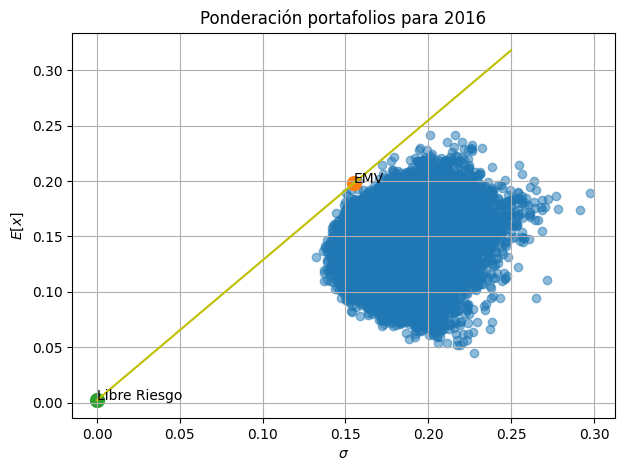

 El portafolio tiene un valor esperado del 19.8134%, con una volatilidad del 15.5089%.
 El portafolio tuvo realmente un rendimiento del 31.7979%.

2017
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un 5.7685% bonos y un 94.2315% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 14.5289%
   IBM: 7.6258%
   KO: 1.5311%
   BBY: 2.4048%
   CAT: 16.055%
   AMZN: 3.3801%
   MGM: 0.391%
   V: 1.5944%
   JNJ: 13.8851%
   XOM: 2.4217%
   GOOGL: 0.4692%
   CME: 0.3426%
   JPM: 21.846%
   COST: 12.2594%
   NVDA: 1.2648%


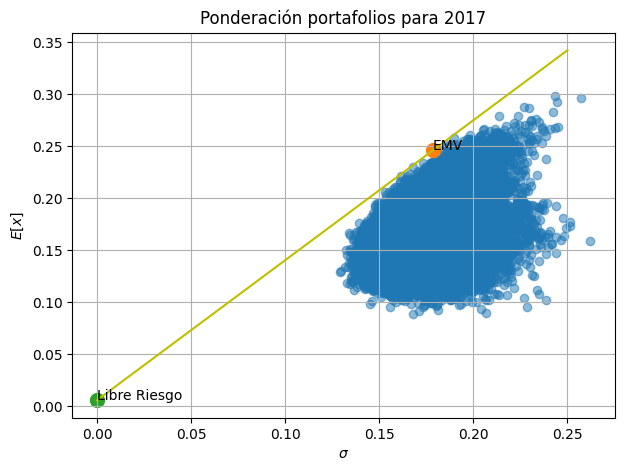

 El portafolio tiene un valor esperado del 24.5952%, con una volatilidad del 17.8521%.
 El portafolio tuvo realmente un rendimiento del 28.5498%.

2018
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un -58.4839% bonos y un 158.4839% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 6.6808%
   IBM: 3.688%
   KO: 1.626%
   BBY: 19.8521%
   CAT: 0.5742%
   AMZN: 6.1836%
   MGM: 0.0848%
   V: 1.3007%
   JNJ: 14.1431%
   XOM: 9.533%
   GOOGL: 3.0737%
   CME: 1.0637%
   JPM: 23.1097%
   COST: 8.4565%
   NVDA: 0.63%


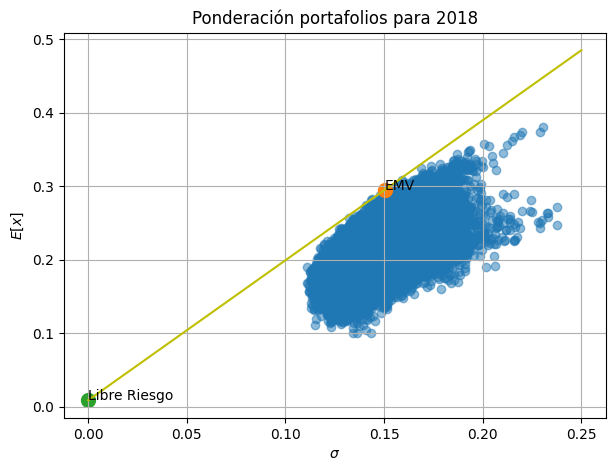

 El portafolio tiene un valor esperado del 29.4711%, con una volatilidad del 15.0194%.
 El portafolio tuvo realmente un rendimiento del -10.2455%.

2019
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un -33.6475% bonos y un 133.6475% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 7.1903%
   IBM: 10.8134%
   KO: 1.8703%
   BBY: 30.3258%
   CAT: 7.3269%
   AMZN: 1.1518%
   MGM: 2.7878%
   V: 0.4103%
   JNJ: 4.6599%
   XOM: 2.7699%
   GOOGL: 4.2761%
   CME: 2.6805%
   JPM: 17.3839%
   COST: 6.2316%
   NVDA: 0.1216%


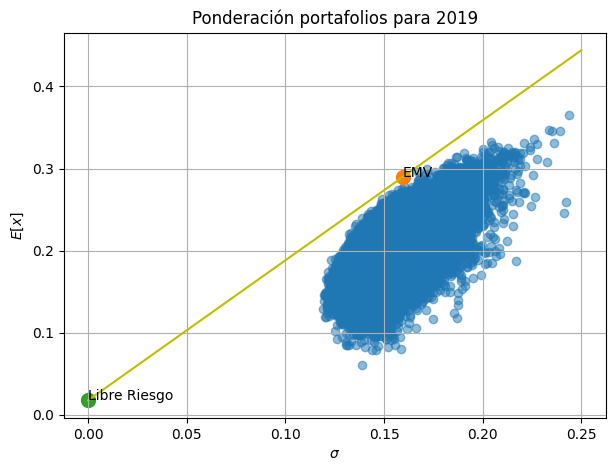

 El portafolio tiene un valor esperado del 28.9809%, con una volatilidad del 15.9502%.
 El portafolio tuvo realmente un rendimiento del 49.637%.

2020
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un -3.2226% bonos y un 103.2226% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 5.0744%
   IBM: 5.1752%
   KO: 2.5821%
   BBY: 23.9642%
   CAT: 2.6049%
   AMZN: 1.8318%
   MGM: 1.591%
   V: 0.712%
   JNJ: 13.8982%
   XOM: 4.8122%
   GOOGL: 0.9775%
   CME: 1.795%
   JPM: 27.4847%
   COST: 4.9383%
   NVDA: 2.5585%


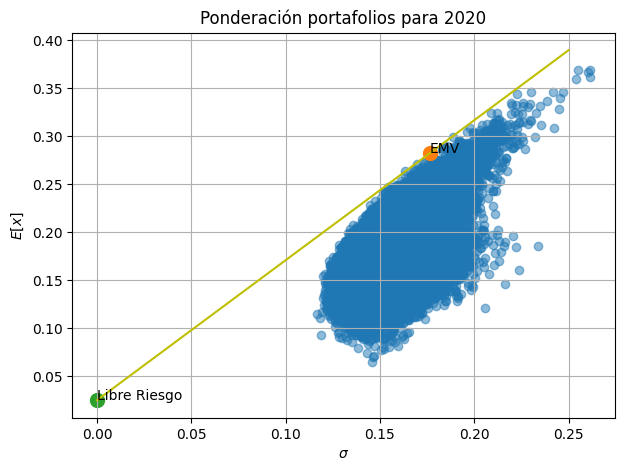

 El portafolio tiene un valor esperado del 28.2244%, con una volatilidad del 17.643%.
 El portafolio tuvo realmente un rendimiento del 9.4674%.

2021
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un 23.9283% bonos y un 76.0717% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 41.2558%
   IBM: 1.4918%
   KO: 0.262%
   BBY: 6.4274%
   CAT: 2.1347%
   AMZN: 6.8306%
   MGM: 1.8483%
   V: 1.1608%
   JNJ: 2.995%
   XOM: 0.0355%
   GOOGL: 1.2939%
   CME: 2.3129%
   JPM: 22.4835%
   COST: 9.2325%
   NVDA: 0.2352%


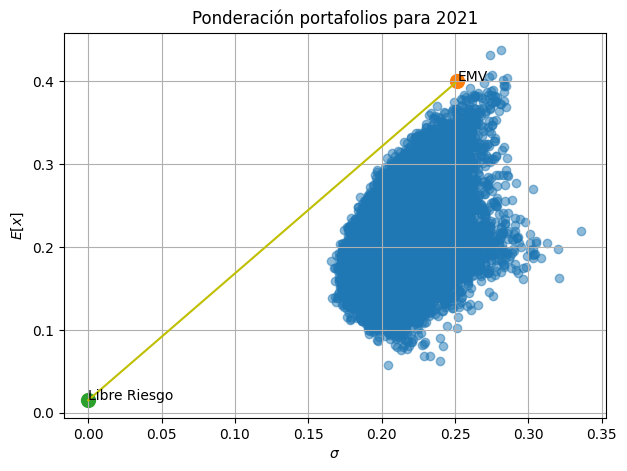

 El portafolio tiene un valor esperado del 40.0346%, con una volatilidad del 25.1568%.
 El portafolio tuvo realmente un rendimiento del 26.0745%.

2022
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un 6.6155% bonos y un 93.3845% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 9.9743%
   IBM: 5.1545%
   KO: 14.2077%
   BBY: 6.7224%
   CAT: 22.3603%
   AMZN: 0.1637%
   MGM: 1.2533%
   V: 0.1635%
   JNJ: 5.3441%
   XOM: 2.9932%
   GOOGL: 0.8667%
   CME: 0.0332%
   JPM: 20.8999%
   COST: 8.7031%
   NVDA: 1.1601%


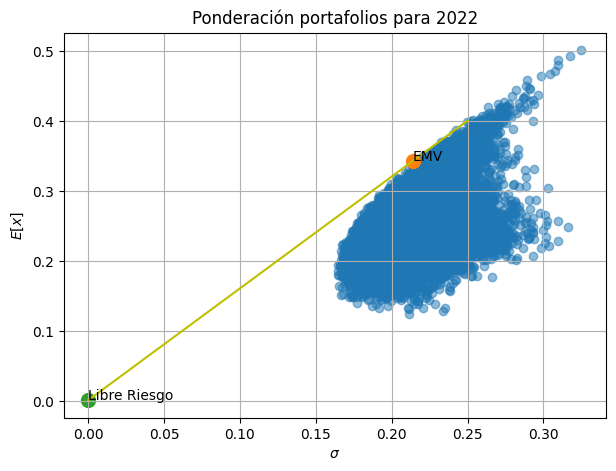

 El portafolio tiene un valor esperado del 34.2982%, con una volatilidad del 21.3953%.
 El portafolio tuvo realmente un rendimiento del -3.0323%.

2023
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un 39.545% bonos y un 60.455% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 5.7137%
   IBM: 3.5817%
   KO: 18.532%
   BBY: 0.97%
   CAT: 32.1596%
   AMZN: 0.8149%
   MGM: 0.5426%
   V: 1.6459%
   JNJ: 12.5223%
   XOM: 1.3033%
   GOOGL: 0.5881%
   CME: 0.8116%
   JPM: 12.4767%
   COST: 7.3726%
   NVDA: 0.9649%


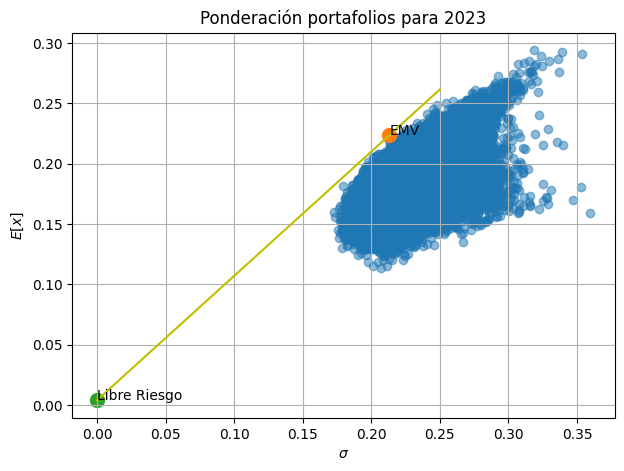

 El portafolio tiene un valor esperado del 22.3429%, con una volatilidad del 21.3052%.
 El portafolio tuvo realmente un rendimiento del 17.5172%.

2024
 El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un 50.342% bonos y un 49.658% acciones.
 Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:
   HPQ: 4.6083%
   IBM: 2.6828%
   KO: 0.9122%
   BBY: 0.7906%
   CAT: 46.1237%
   AMZN: 7.0218%
   MGM: 1.9371%
   V: 0.0888%
   JNJ: 5.4579%
   XOM: 6.0331%
   GOOGL: 0.4912%
   CME: 1.0446%
   JPM: 19.0262%
   COST: 3.3525%
   NVDA: 0.4293%


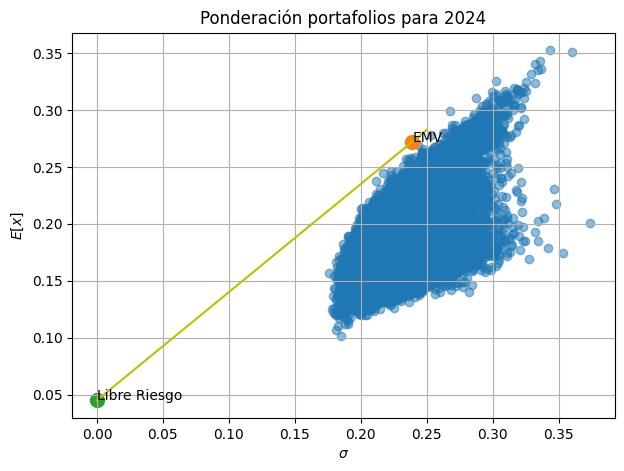

 El portafolio tiene un valor esperado del 27.2253%, con una volatilidad del 23.9175%.
 El portafolio tuvo realmente un rendimiento del 12.5976%.

El rendimiento total del portafolio durante el periodo de tenencia es del 402.944%.
El rendimiento promedio compuesto del portafolio desde el el 2016 hasta 2024 es del 16.748% anual.
De haber invertido $10000 USD en el 2016 y no se hubiera tocado el capital, se tendrían $40294.4 USD en 2024.


In [28]:
for i in years:
    print(i + 1)
    print(" El portafolio, con un coeficiente de aversión al riesgo de 8, está conformado por un " + str(np.round(datos[i][5] * 100, 4)) + "% bonos y un " +
          str(np.round(datos[i][6] * 100, 4)) + "% acciones.")
    print(" Dentro del porcentaje de las acciones el peso individual se distribuye de la siguiente manera:")
    for j in range(len(tickers)):
        print("   " + tickers[j] + ": " + str(np.round(datos[i][4][j] * 100, 4)) + "%")

    plt.figure(figsize=(7, 5))
    plt.scatter(datos[i][0], datos[i][1], alpha=0.5)
    plt.scatter(datos[i][2], datos[i][3], s=100)
    plt.text(datos[i][2], datos[i][3], "EMV")
    plt.plot(s, datos[i][7], c="y")
    plt.scatter(0, datos[i][8], s=100)
    plt.text(0, datos[i][8], "Libre Riesgo")
    plt.grid()
    plt.title("Ponderación portafolios para " + str(i + 1))
    plt.xlabel("$\sigma$")
    plt.ylabel("$E[x]$")
    plt.show()

    print(" El portafolio tiene un valor esperado del " + str(np.round(datos[i][3] * 100, 4)) + "%, con una volatilidad del " + str(np.round(datos[i][2] * 100, 4)) + "%.")
    print(" El portafolio tuvo realmente un rendimiento del " + str(np.round(rend_anual[i - 2015].sum() * 100, 4)) + "%.")

    print()

print("El rendimiento total del portafolio durante el periodo de tenencia es del " + str(np.round(e[-1] * 100, 4)) + "%.")
print("El rendimiento promedio compuesto del portafolio desde el el 2016 hasta 2024 es del "+ str(np.round(rend_prom * 100, 4)) + "% anual.")
print("De haber invertido $10000 USD en el 2016 y no se hubiera tocado el capital, se tendrían $" + str(np.round(monto, 2)) + " USD en 2024.")